# Context
Phase three of this project is data cleanup and dimensionality reduction.\
This notebook drives this process for the data that went through the
transformations in PH2.

In [1]:
# Set project's environment variables
import os
import sys
from dotenv import load_dotenv
load_dotenv(dotenv_path="../project.env")
sys.path.append(os.environ["PYTHONPATH"])

import pickle

In [2]:
# Import project-wide and PH2 specific variables and functions
import superheader as sup
import PH3header as ph3



Chosen class grouping: all-classes


Directory /Users/diego/Desktop/iteso/TOG/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/src exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/media exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/scores exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH1/all-classes exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH2/all-classes exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes exists. Continuing with execution


In [3]:
PH3_IS_W2 = False

if PH3_IS_W2:
  prePH3_ROOT = sup.PH2_DATA_ROOT
  PH3_SUB_DATA_ROOT = os.path.join(sup.PH3_DATA_ROOT, sup.PH3_W2_CODE)
  PH3_SUB_BINGEN_ROOT = os.path.join(sup.PH3_BINGEN_ROOT, sup.PH3_W2_CODE)
  PH3_SUB_MEDIAGEN_ROOT = os.path.join(sup.PH3_MEDIAGEN_ROOT, sup.PH3_W2_CODE)
else:
  prePH3_ROOT = sup.PH1_DATA_ROOT
  PH3_SUB_DATA_ROOT = os.path.join(sup.PH3_DATA_ROOT, sup.PH3_WO2_CODE)
  PH3_SUB_BINGEN_ROOT = os.path.join(sup.PH3_BINGEN_ROOT, sup.PH3_WO2_CODE)
  PH3_SUB_MEDIAGEN_ROOT = os.path.join(sup.PH3_MEDIAGEN_ROOT, sup.PH3_WO2_CODE)

sup.report_dir_if_not_exists(prePH3_ROOT)
sup.create_dir_if_not_exists(PH3_SUB_DATA_ROOT)
sup.create_dir_if_not_exists(PH3_SUB_BINGEN_ROOT)
sup.create_dir_if_not_exists(PH3_SUB_MEDIAGEN_ROOT)

Directory /Users/diego/Desktop/iteso/TOG/data/PH1/all-classes exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes/wo2 does not exist. Creating it and continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/all-classes/wo2 exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/all-classes/wo2 does not exist. Creating it and continuing with execution


# Source dataframe loading

In [4]:
import pandas as pd

## Active hand detection

In [5]:
prePH3_ah_frame_df = pd.read_csv(os.path.join(prePH3_ROOT, f"{sup.DATA_AH_PF}.csv"))
prePH3_ah_frame_df

,fileid,person_id,cycle_num,handedness,class_name,class_numeric,current_frame,h0x,h0y,h0z,...,p0x,p0y,p0z,p11x,p11y,p11z,p12x,p12y,p12z,active_hand
0,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_1.mp4,p01,1,0,1,29,0,0.413438,0.516854,-9.053193e-08,...,0.498476,0.318532,-0.423539,0.577536,0.519796,-0.141686,0.425831,0.492205,-0.158985,1
1,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_1.mp4,p01,1,0,1,29,0,0.568475,0.911143,1.136299e-09,...,0.498476,0.318532,-0.423539,0.577536,0.519796,-0.141686,0.425831,0.492205,-0.158985,0
2,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_1.mp4,p01,1,0,1,29,1,0.411601,0.525609,-9.427173e-08,...,0.497645,0.315444,-0.436276,0.577870,0.520437,-0.134161,0.424087,0.495226,-0.161746,1
3,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_1.mp4,p01,1,0,1,29,1,0.568473,0.911162,1.245373e-09,...,0.497645,0.315444,-0.436276,0.577870,0.520437,-0.134161,0.424087,0.495226,-0.161746,0
4,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_1.mp4,p01,1,0,1,29,2,0.409486,0.530432,-8.504437e-08,...,0.497244,0.318666,-0.457492,0.579072,0.523931,-0.151225,0.423043,0.499277,-0.169967,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94294,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,28,9,0.632517,0.482991,-1.874786e-07,...,0.484490,0.289181,-0.421546,0.572918,0.474172,-0.078406,0.397896,0.484275,-0.113990,1
94295,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,28,10,0.634008,0.486989,-1.780656e-07,...,0.483038,0.285413,-0.406400,0.570957,0.473768,-0.055774,0.396282,0.485782,-0.104788,1
94296,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,28,10,0.403709,0.829567,1.847001e-08,...,0.483038,0.285413,-0.406400,0.570957,0.473768,-0.055774,0.396282,0.485782,-0.104788,0
94297,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,28,11,0.643907,0.492386,-1.789463e-07,...,0.480457,0.287692,-0.410172,0.570401,0.466859,-0.068966,0.398920,0.484171,-0.099403,1


# Cleanup

## Identify numeric columns which will go through standardization and dimensionality reduction

In [6]:
if PH3_IS_W2:
  ah_pf_dataCols = sup.pf_wrist_hand_landmark_columns+sup.pf_chest_pose_landmark_columns+sup.pf_h_v123_columns
else:
  ah_pf_dataCols = sup.pf_hand_landmark_columns+sup.pf_pose_landmark_columns

## Standardize data

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
ah_pf_scaler = StandardScaler()

PH3_AH_FRM_std_df = prePH3_ah_frame_df[sup.tag_columns+sup.class_columns+[sup.current_frame_col]]
PH3_AH_FRM_std_df[ah_pf_dataCols] = ah_pf_scaler.fit_transform(prePH3_ah_frame_df[ah_pf_dataCols])

PH3_AH_FRM_std_df

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_13199/683750519.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PH3_AH_FRM_std_df[ah_pf_dataCols] = ah_pf_scaler.fit_transform(prePH3_ah_frame_df[ah_pf_dataCols])
/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_13199/683750519.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PH3_AH_FRM_std_df[ah_pf_dataCols] = ah_pf_scaler.fit_transform(prePH3_ah_frame_df[ah_pf_dataCols])
/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_1

,fileid,person_id,cycle_num,handedness,class_name,class_numeric,active_hand,current_frame,h0x,h0y,...,h20z,p0x,p0y,p0z,p11x,p11y,p11z,p12x,p12y,p12z
0,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_1.mp4,p01,1,0,1,29,1,0,-0.842422,-0.385329,...,1.381177,0.223574,1.045712,0.159334,0.067946,1.801046,0.104214,0.511931,1.352023,-0.062896
1,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_1.mp4,p01,1,0,1,29,0,0,0.691642,1.608619,...,0.602213,0.223574,1.045712,0.159334,0.067946,1.801046,0.104214,0.511931,1.352023,-0.062896
2,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_1.mp4,p01,1,0,1,29,1,1,-0.860598,-0.341054,...,1.253493,0.191316,0.993703,0.069978,0.078902,1.811585,0.170057,0.436113,1.406980,-0.084810
3,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_1.mp4,p01,1,0,1,29,0,1,0.691629,1.608713,...,0.591143,0.191316,0.993703,0.069978,0.078902,1.811585,0.170057,0.436113,1.406980,-0.084810
4,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_1.mp4,p01,1,0,1,29,1,2,-0.881529,-0.316665,...,1.249401,0.175717,1.047970,-0.078858,0.118315,1.869109,0.020752,0.390731,1.480675,-0.150075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94294,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,28,1,9,1.325331,-0.556576,...,0.405750,-0.319737,0.551455,0.173316,-0.083407,1.050043,0.657878,-0.702279,1.207764,0.294316
94295,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,28,1,10,1.340087,-0.536356,...,0.230993,-0.376123,0.487995,0.279573,-0.147687,1.043386,0.855891,-0.772412,1.235191,0.367372
94296,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,28,0,10,-0.938692,1.196083,...,-0.258639,-0.376123,0.487995,0.279573,-0.147687,1.043386,0.855891,-0.772412,1.235191,0.367372
94297,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,28,1,11,1.438029,-0.509064,...,0.548030,-0.476381,0.526373,0.253109,-0.165910,0.929659,0.740467,-0.657758,1.205867,0.410124


## Save standardizers

In [9]:
with open(os.path.join(PH3_SUB_BINGEN_ROOT, f"scaler_{sup.DATA_AH_PF}.pkl"), 'wb') as f:
  pickle.dump(ah_pf_scaler, f)

# Dimensionality Reduction

## Helper functions

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.pipeline import make_pipeline
from sklearn.kernel_approximation import Nystroem
from sklearn.decomposition import PCA
import umap.umap_ as umap

/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
def flatten_video(group):
  data_cols = [col for col in group.columns if col not in 
                sup.tag_columns + sup.class_columns + [sup.current_frame_col]]

  flattened_dict = {}

  frame_list = []
  for _, row in group.iterrows():
      frame_num = int(row[sup.current_frame_col])
      frame_list.append(frame_num)
      prefix = f"f{frame_num}_"
      for col in data_cols:
          flattened_dict[prefix + col] = row[col]

  if frame_list != [i for i in range(12)]:
     print("Big probelm 2")
     print(frame_list)
     print(group.iloc[0][sup.tag_columns])

  # Add the group keys (the tags)
  group_keys = group.iloc[0][sup.tag_columns + sup.class_columns].to_dict()
  group_keys.update(flattened_dict)
  return pd.DataFrame([group_keys])

In [12]:
def visualize(origin_df, data_cols, data_unit, label_col, reducer_name, kernel_name=""):    
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    if label_col == sup.active_hand_col:
        filtered_df = origin_df
    else:
        spf_df = origin_df[origin_df[sup.active_hand_col] == 1]
        if data_unit == sup.DATA_S_PF:
            filtered_df = spf_df
        elif data_unit == sup.DATA_S_PV:
            filtered_df = spf_df\
                .groupby(sup.tag_columns+sup.class_columns)\
                .apply(flatten_video).reset_index(drop=True)

    labels_cat = filtered_df[label_col].astype('category')
    categories = labels_cat.cat.categories
    cat_to_idx = {cat: i for i, cat in enumerate(categories)}
    colors = labels_cat.map(cat_to_idx)
    cmap = plt.cm.Spectral

    if reducer_name == sup.PH3_REDUCER_NAME_PCA:
        reducer = PCA(n_components=3, random_state=42)
    elif reducer_name == sup.PH3_REDUCER_NAME_UMAP:
        reducer = umap.UMAP(n_components=3, random_state=42)
    elif reducer_name == sup.PH3_REDUCER_NAME_KPCA:
        nystroem = Nystroem(kernel=kernel_name, gamma=0.5, n_components=500)
        reducer = make_pipeline(nystroem, PCA(n_components=3, random_state=42))

    if data_unit == sup.DATA_S_PV:
        filtered_data = reducer.fit_transform(filtered_df.drop(columns=sup.tag_columns+sup.class_columns))
    else:
        data = reducer.fit_transform(origin_df.drop(columns=sup.tag_columns+sup.class_columns+[sup.current_frame_col]))
        if label_col == sup.active_hand_col:
            filtered_data = data
        else:
            filtered_data = data[origin_df[sup.active_hand_col] == 1]
    
    sc = ax.scatter(filtered_data[:, 0], filtered_data[:, 1], filtered_data[:, 2], c=colors, cmap=cmap, s=20)

    for cat, idx in cat_to_idx.items():
        ax.scatter([], [], [], color=cmap(idx / (len(categories) - 1)), label=cat)
    ax.legend(title=label_col)

    figtitle = f"{reducer_name}-{kernel_name}-{data_unit}"
    ax.set_title(figtitle)

    PH3_SUB3_MEDIAGEN_ROOT = os.path.join(PH3_SUB_MEDIAGEN_ROOT, reducer_name, kernel_name)
    sup.create_dir_if_not_exists(PH3_SUB3_MEDIAGEN_ROOT)
    figpath = os.path.join(PH3_SUB3_MEDIAGEN_ROOT, f"{figtitle}.png")
    plt.savefig(figpath, dpi=300, bbox_inches='tight')

    plt.show()

def writeout(origin_df, data_cols, label_cols, reducer_name, kernel_name=""):
    for n in sup.PH3_N_CANDIDATES:
        if reducer_name == sup.PH3_REDUCER_NAME_PCA:
            reducer = PCA(n_components=n, random_state=42)
        elif reducer_name == sup.PH3_REDUCER_NAME_UMAP:
            reducer = umap.UMAP(n_components=n, random_state=42)
        elif reducer_name == sup.PH3_REDUCER_NAME_KPCA:
            nystroem = Nystroem(kernel=kernel_name, gamma=0.5, n_components=500)
            reducer = make_pipeline(nystroem, PCA(n_components=n, random_state=42))

        data = reducer.fit_transform(origin_df[data_cols])

        reduced_df = pd.DataFrame(data)
        reduced_df[sup.tag_columns+label_cols+[sup.current_frame_col]] = origin_df[sup.tag_columns+label_cols+[sup.current_frame_col]]

        PH3_SUB3_DATA_ROOT = os.path.join(PH3_SUB_DATA_ROOT, reducer_name, kernel_name)
        sup.create_dir_if_not_exists(PH3_SUB3_DATA_ROOT)
        PH3_SUB3_BINGEN_ROOT = os.path.join(PH3_SUB_BINGEN_ROOT, reducer_name, kernel_name)
        sup.create_dir_if_not_exists(PH3_SUB3_BINGEN_ROOT)

        reduced_df.to_csv(os.path.join(PH3_SUB3_DATA_ROOT, f"{sup.DATA_AH_PF}_{n}.csv"), index=False)
        with open(os.path.join(PH3_SUB3_BINGEN_ROOT, f"{sup.DATA_AH_PF}{n}.pkl"), 'wb') as f:
            pickle.dump(reducer, f)

## PCA

In [13]:
PH3_AH_FRM_PCA_df = PH3_AH_FRM_std_df.copy()

In [14]:
PH3_AH_FRM_PCA_df[PH3_AH_FRM_PCA_df['fileid'] == 'p01/Ciclo_3_5_Izquierda/Ciclo_3_5_Izquierda_n.mp4']

,fileid,person_id,cycle_num,handedness,class_name,class_numeric,active_hand,current_frame,h0x,h0y,...,h20z,p0x,p0y,p0z,p11x,p11y,p11z,p12x,p12y,p12z


### Active hand detection

#### Exploration

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/all-classes/wo2/pca/ does not exist. Creating it and continuing with execution


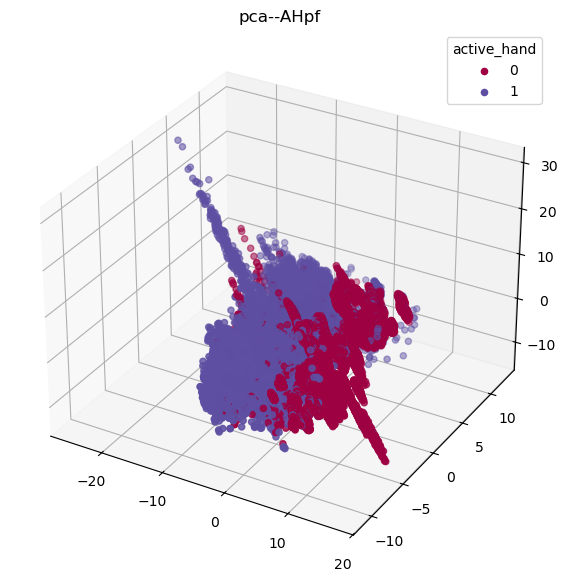

In [15]:
visualize(origin_df=PH3_AH_FRM_PCA_df, data_cols=ah_pf_dataCols, data_unit=sup.DATA_AH_PF, label_col=sup.active_hand_col, reducer_name=sup.PH3_REDUCER_NAME_PCA, kernel_name='')

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/all-classes/wo2/pca/ exists. Continuing with execution


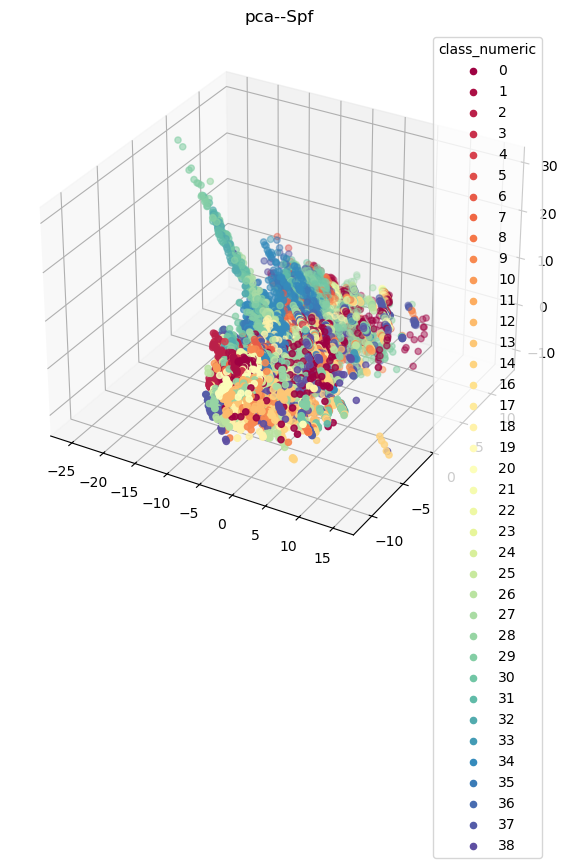

In [16]:
visualize(origin_df=PH3_AH_FRM_PCA_df, data_cols=ah_pf_dataCols, data_unit=sup.DATA_S_PF, label_col=sup.class_numeric_column, reducer_name=sup.PH3_REDUCER_NAME_PCA, kernel_name='')

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_13199/472059142.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(flatten_video).reset_index(drop=True)


Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/all-classes/wo2/pca/ exists. Continuing with execution


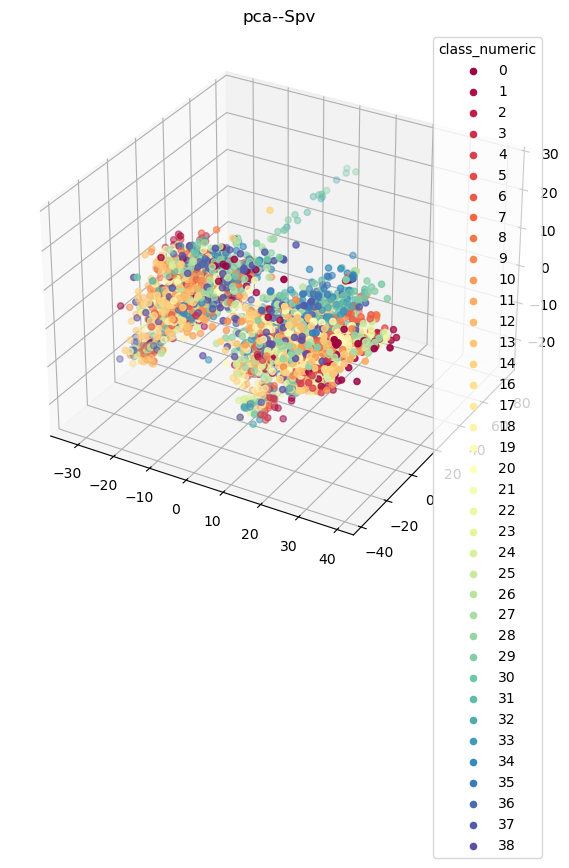

In [17]:
visualize(origin_df=PH3_AH_FRM_PCA_df, data_cols=ah_pf_dataCols, data_unit=sup.DATA_S_PV, label_col=sup.class_numeric_column, reducer_name=sup.PH3_REDUCER_NAME_PCA, kernel_name='')

#### Writeout

In [18]:
writeout(origin_df=PH3_AH_FRM_PCA_df, data_cols=ah_pf_dataCols, label_cols=sup.class_columns, reducer_name=sup.PH3_REDUCER_NAME_PCA, kernel_name='')

Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes/wo2/pca/ does not exist. Creating it and continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/all-classes/wo2/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes/wo2/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/all-classes/wo2/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes/wo2/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/all-classes/wo2/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes/wo2/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/all-classes/wo2/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes/wo2/pca/ exists. Continuing with execution
Directory /Users/di

## Kernel PCA

In [19]:
PH3_AH_FRM_KPCA_df = PH3_AH_FRM_std_df.copy()

### Active hand detection

In [20]:
PH3_AH_FRM_KPCA_df

,fileid,person_id,cycle_num,handedness,class_name,class_numeric,active_hand,current_frame,h0x,h0y,...,h20z,p0x,p0y,p0z,p11x,p11y,p11z,p12x,p12y,p12z
0,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_1.mp4,p01,1,0,1,29,1,0,-0.842422,-0.385329,...,1.381177,0.223574,1.045712,0.159334,0.067946,1.801046,0.104214,0.511931,1.352023,-0.062896
1,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_1.mp4,p01,1,0,1,29,0,0,0.691642,1.608619,...,0.602213,0.223574,1.045712,0.159334,0.067946,1.801046,0.104214,0.511931,1.352023,-0.062896
2,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_1.mp4,p01,1,0,1,29,1,1,-0.860598,-0.341054,...,1.253493,0.191316,0.993703,0.069978,0.078902,1.811585,0.170057,0.436113,1.406980,-0.084810
3,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_1.mp4,p01,1,0,1,29,0,1,0.691629,1.608713,...,0.591143,0.191316,0.993703,0.069978,0.078902,1.811585,0.170057,0.436113,1.406980,-0.084810
4,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_1.mp4,p01,1,0,1,29,1,2,-0.881529,-0.316665,...,1.249401,0.175717,1.047970,-0.078858,0.118315,1.869109,0.020752,0.390731,1.480675,-0.150075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94294,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,28,1,9,1.325331,-0.556576,...,0.405750,-0.319737,0.551455,0.173316,-0.083407,1.050043,0.657878,-0.702279,1.207764,0.294316
94295,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,28,1,10,1.340087,-0.536356,...,0.230993,-0.376123,0.487995,0.279573,-0.147687,1.043386,0.855891,-0.772412,1.235191,0.367372
94296,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,28,0,10,-0.938692,1.196083,...,-0.258639,-0.376123,0.487995,0.279573,-0.147687,1.043386,0.855891,-0.772412,1.235191,0.367372
94297,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,28,1,11,1.438029,-0.509064,...,0.548030,-0.476381,0.526373,0.253109,-0.165910,0.929659,0.740467,-0.657758,1.205867,0.410124


#### Exploration

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/all-classes/wo2/kpca/poly does not exist. Creating it and continuing with execution


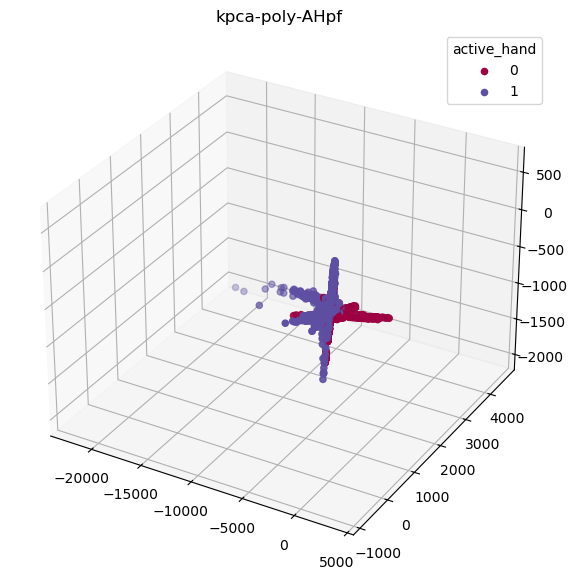

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/all-classes/wo2/kpca/rbf does not exist. Creating it and continuing with execution


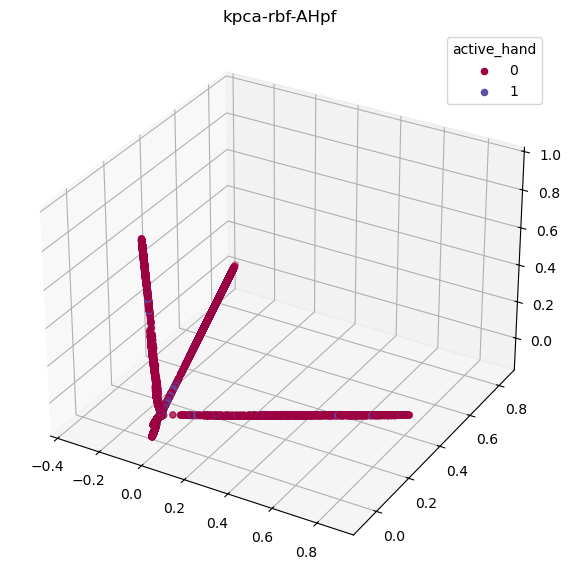

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/all-classes/wo2/kpca/sigmoid does not exist. Creating it and continuing with execution


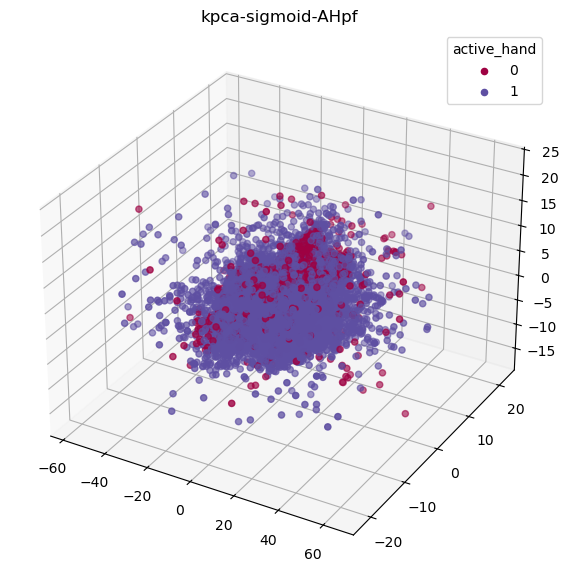

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/all-classes/wo2/kpca/cosine does not exist. Creating it and continuing with execution


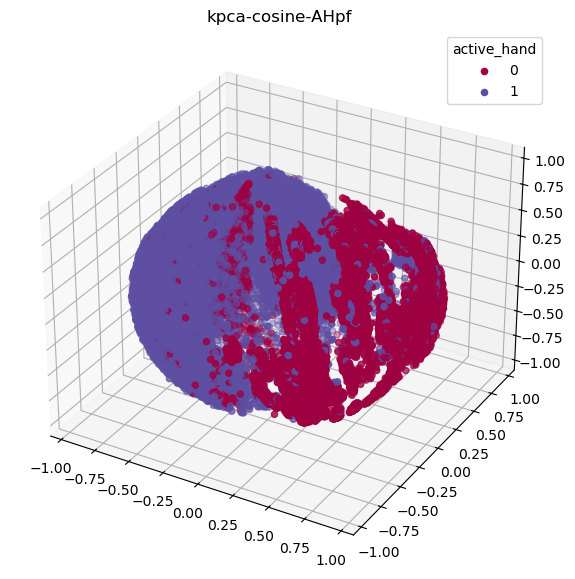

In [21]:
for kernel_name in sup.PH3_REDUCER_KERNEL_NAMES:
  visualize(origin_df=PH3_AH_FRM_KPCA_df, data_cols=ah_pf_dataCols, data_unit=sup.DATA_AH_PF, label_col=sup.active_hand_col, reducer_name=sup.PH3_REDUCER_NAME_KPCA, kernel_name=kernel_name)

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/all-classes/wo2/kpca/poly exists. Continuing with execution


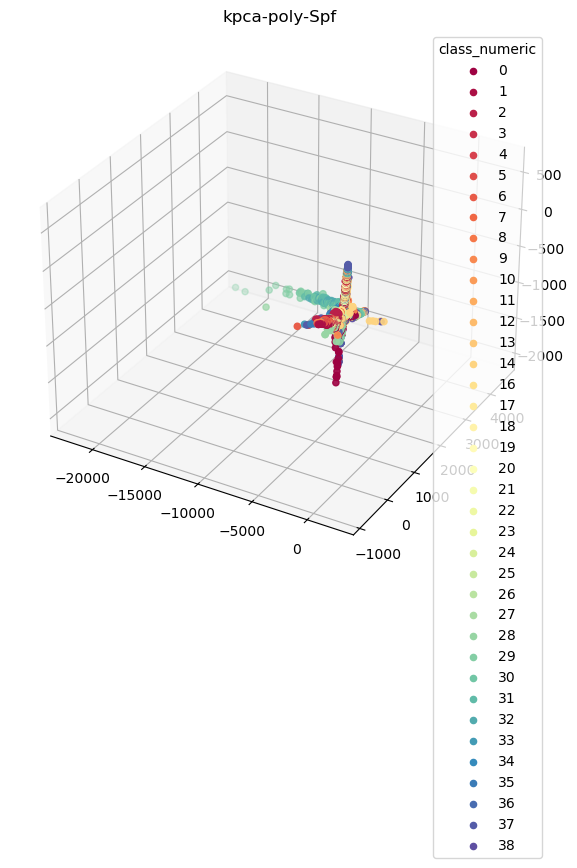

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/all-classes/wo2/kpca/rbf exists. Continuing with execution


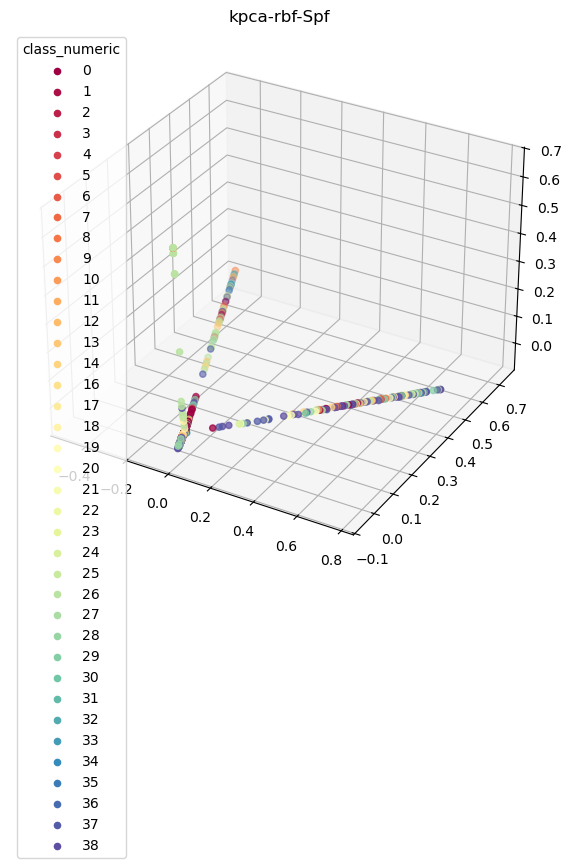

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/all-classes/wo2/kpca/sigmoid exists. Continuing with execution


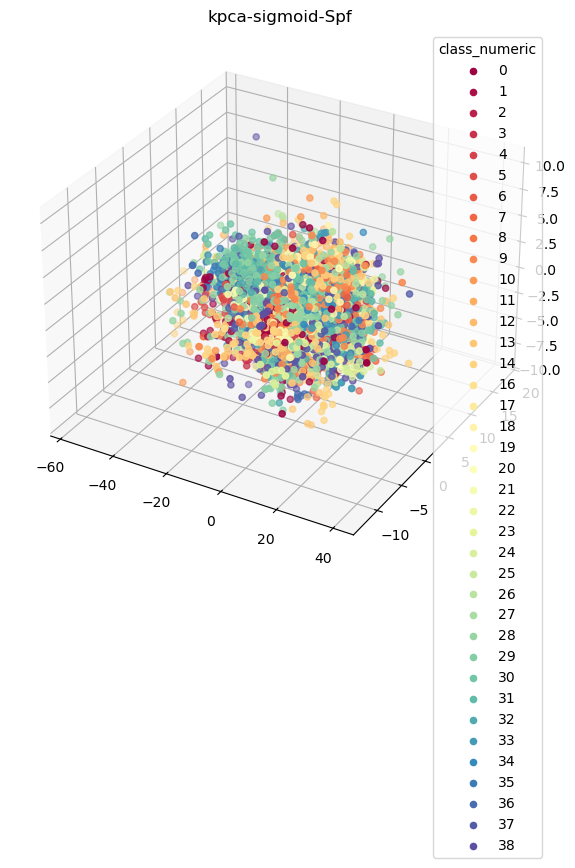

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/all-classes/wo2/kpca/cosine exists. Continuing with execution


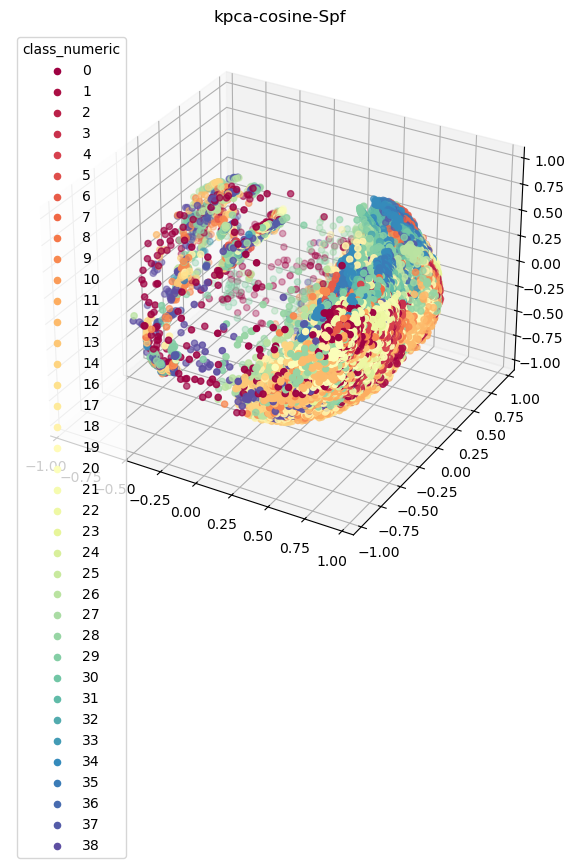

In [22]:
for kernel_name in sup.PH3_REDUCER_KERNEL_NAMES:
  visualize(origin_df=PH3_AH_FRM_KPCA_df, data_cols=ah_pf_dataCols, data_unit=sup.DATA_S_PF, label_col=sup.class_numeric_column, reducer_name=sup.PH3_REDUCER_NAME_KPCA, kernel_name=kernel_name)

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_13199/472059142.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(flatten_video).reset_index(drop=True)


Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/all-classes/wo2/kpca/poly exists. Continuing with execution


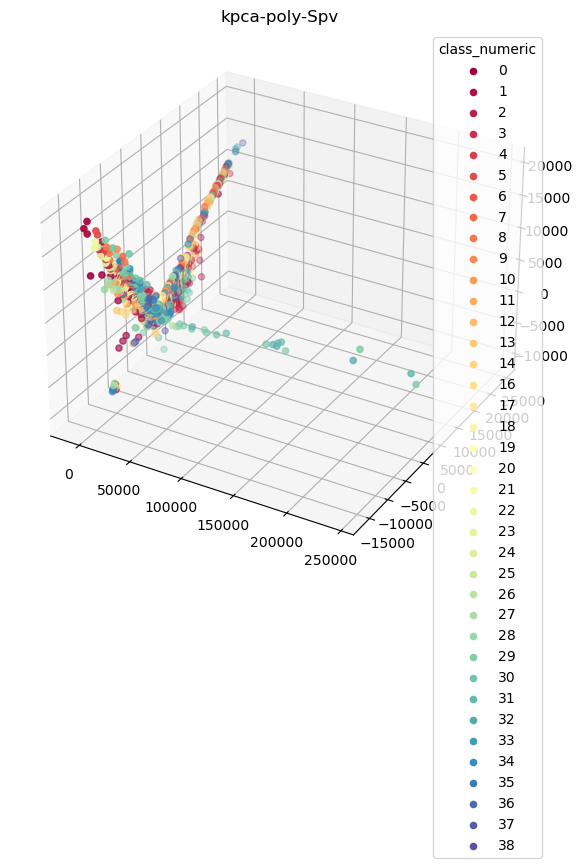

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_13199/472059142.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(flatten_video).reset_index(drop=True)


Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/all-classes/wo2/kpca/rbf exists. Continuing with execution


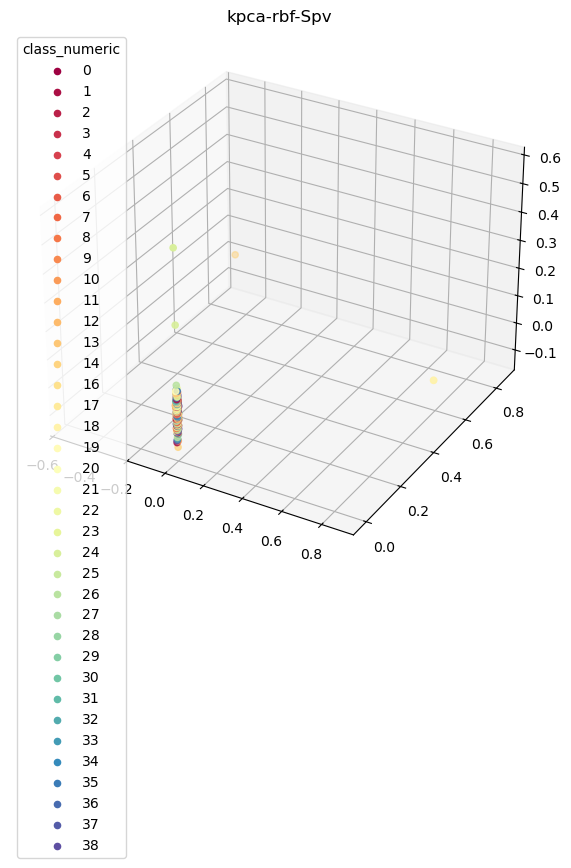

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_13199/472059142.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(flatten_video).reset_index(drop=True)


Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/all-classes/wo2/kpca/sigmoid exists. Continuing with execution


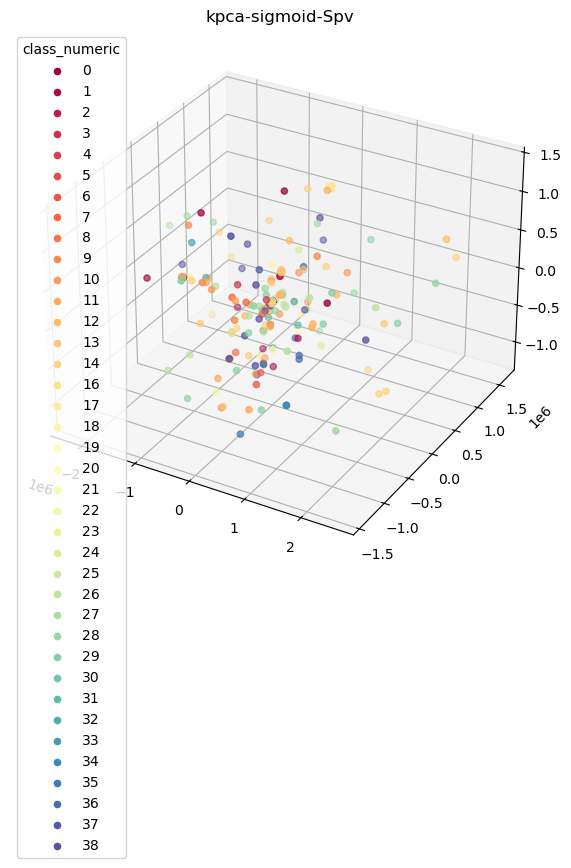

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_13199/472059142.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(flatten_video).reset_index(drop=True)


Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/all-classes/wo2/kpca/cosine exists. Continuing with execution


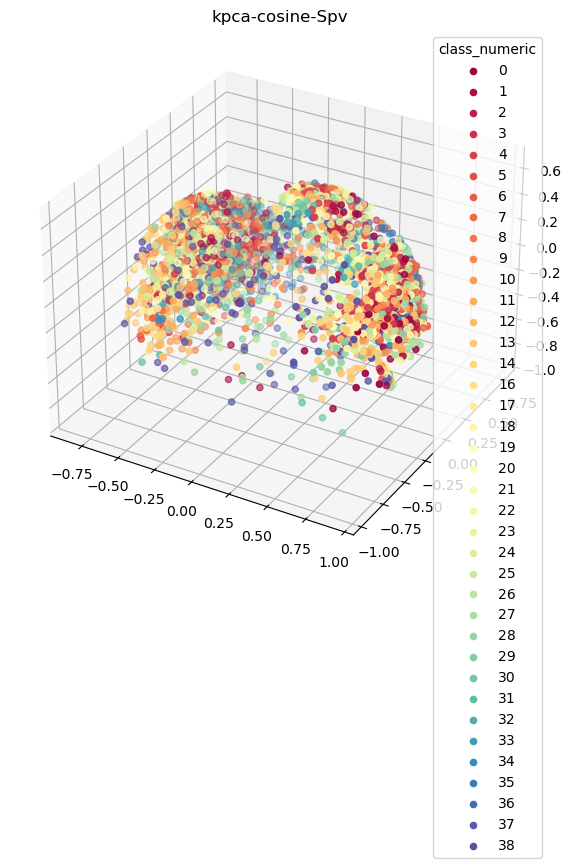

In [23]:
for kernel_name in sup.PH3_REDUCER_KERNEL_NAMES:
  visualize(origin_df=PH3_AH_FRM_KPCA_df, data_cols=ah_pf_dataCols, data_unit=sup.DATA_S_PV, label_col=sup.class_numeric_column, reducer_name=sup.PH3_REDUCER_NAME_KPCA, kernel_name=kernel_name)

#### Writeout

In [24]:
for kernel_name in sup.PH3_REDUCER_KERNEL_NAMES:
  writeout(origin_df=PH3_AH_FRM_KPCA_df, data_cols=ah_pf_dataCols, label_cols=sup.class_columns, reducer_name=sup.PH3_REDUCER_NAME_KPCA, kernel_name=kernel_name)

Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes/wo2/kpca/poly does not exist. Creating it and continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/all-classes/wo2/kpca/poly does not exist. Creating it and continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes/wo2/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/all-classes/wo2/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes/wo2/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/all-classes/wo2/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes/wo2/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/all-classes/wo2/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classe

## UMAP

In [25]:
PH3_AH_FRM_UMAP_df = PH3_AH_FRM_std_df.copy()

### Active hand detection

#### Exploration

/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/all-classes/wo2/umap/ does not exist. Creating it and continuing with execution


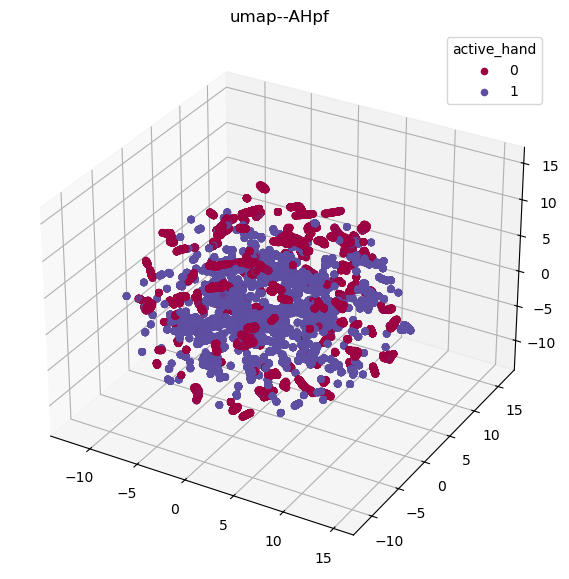

In [26]:
visualize(origin_df=PH3_AH_FRM_UMAP_df, data_cols=ah_pf_dataCols, data_unit=sup.DATA_AH_PF, label_col=sup.active_hand_col, reducer_name=sup.PH3_REDUCER_NAME_UMAP, kernel_name='')

/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/all-classes/wo2/umap/ exists. Continuing with execution


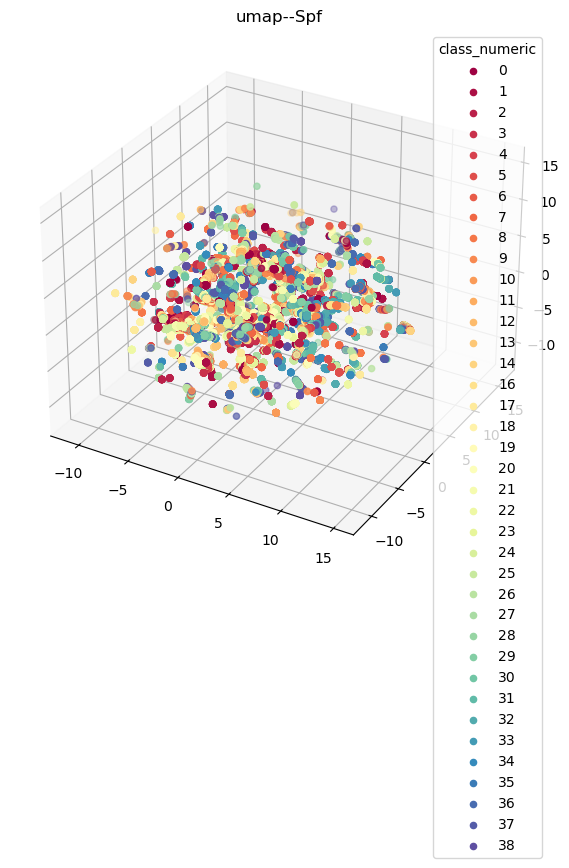

In [27]:
visualize(origin_df=PH3_AH_FRM_UMAP_df, data_cols=ah_pf_dataCols, data_unit=sup.DATA_S_PF,label_col=sup.class_numeric_column, reducer_name=sup.PH3_REDUCER_NAME_UMAP, kernel_name='')

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_13199/472059142.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(flatten_video).reset_index(drop=True)
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/all-classes/wo2/umap/ exists. Continuing with execution


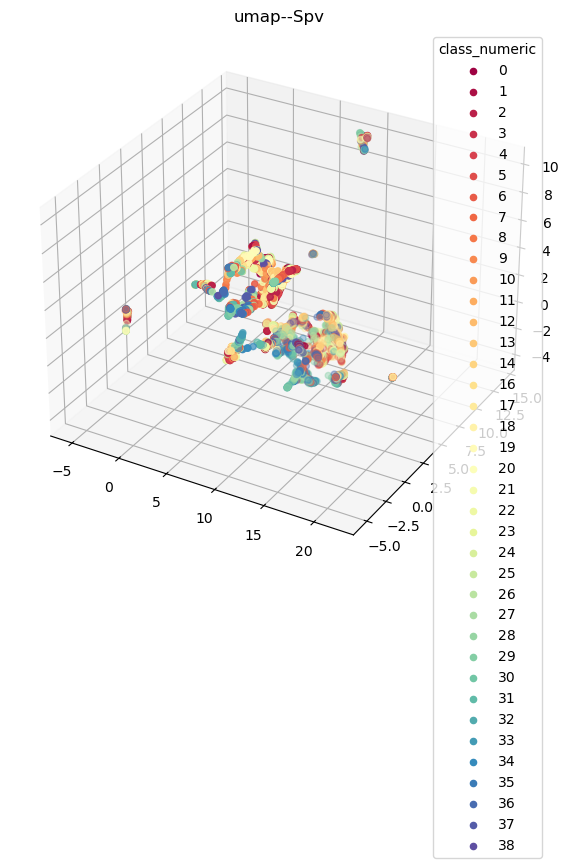

In [28]:
visualize(origin_df=PH3_AH_FRM_UMAP_df, data_cols=ah_pf_dataCols, data_unit=sup.DATA_S_PV,label_col=sup.class_numeric_column, reducer_name=sup.PH3_REDUCER_NAME_UMAP, kernel_name='')

#### Writeout

In [29]:
writeout(origin_df=PH3_AH_FRM_UMAP_df, data_cols=ah_pf_dataCols, label_cols=sup.class_columns, reducer_name=sup.PH3_REDUCER_NAME_UMAP, kernel_name='')

/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes/wo2/umap/ does not exist. Creating it and continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/all-classes/wo2/umap/ does not exist. Creating it and continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes/wo2/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/all-classes/wo2/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes/wo2/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/all-classes/wo2/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes/wo2/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/all-classes/wo2/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes/wo2/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/all-classes/wo2/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes/wo2/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/all-classes/wo2/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes/wo2/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/all-classes/wo2/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes/wo2/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/all-classes/wo2/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes/wo2/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/all-classes/wo2/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes/wo2/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/all-classes/wo2/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes/wo2/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/all-classes/wo2/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes/wo2/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/all-classes/wo2/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes/wo2/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/all-classes/wo2/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes/wo2/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/all-classes/wo2/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes/wo2/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/all-classes/wo2/umap/ exists. Continuing with execution
